<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Decision_Region/Decesion_boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features.
Y = iris.target
X_NAMES=iris.feature_names[2:4]
X_NAMES

['petal length (cm)', 'petal width (cm)']

In [0]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [42]:
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [0]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [44]:
x_min,x_max,y_min,y_max

(0.5, 7.4, -0.4, 3.0)

In [0]:
h = .01  # step size in the mesh

In [0]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [0]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [48]:
Z

array([0, 0, 0, ..., 2, 2, 2])

In [49]:
xx

array([[0.5 , 0.51, 0.52, ..., 7.37, 7.38, 7.39],
       [0.5 , 0.51, 0.52, ..., 7.37, 7.38, 7.39],
       [0.5 , 0.51, 0.52, ..., 7.37, 7.38, 7.39],
       ...,
       [0.5 , 0.51, 0.52, ..., 7.37, 7.38, 7.39],
       [0.5 , 0.51, 0.52, ..., 7.37, 7.38, 7.39],
       [0.5 , 0.51, 0.52, ..., 7.37, 7.38, 7.39]])

([], <a list of 0 Text major ticklabel objects>)

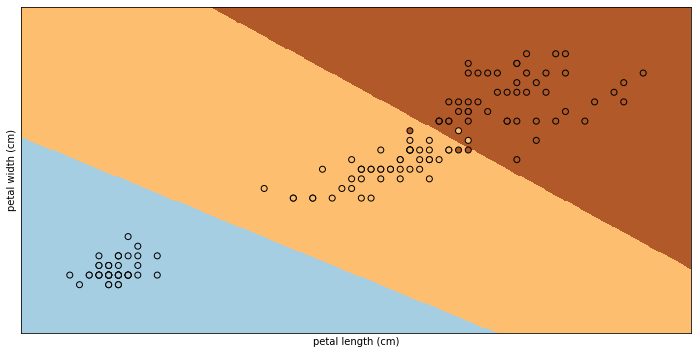

In [55]:
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(X_NAMES[0])
plt.ylabel(X_NAMES[1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [57]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

([], <a list of 0 Text major ticklabel objects>)

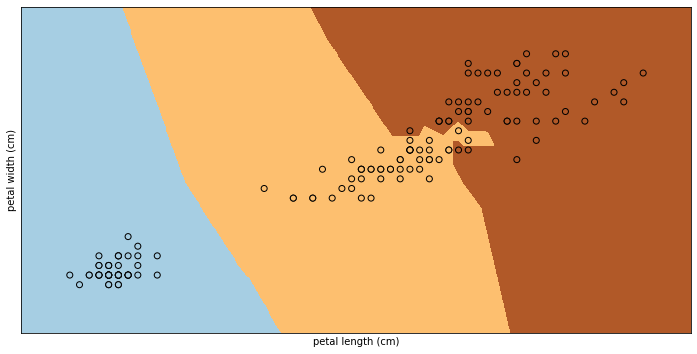

In [60]:
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(X_NAMES[0])
plt.ylabel(X_NAMES[1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())